# Creative Data Mining



## Ocupancy Prediction 


### Natasha Catunda


### HS 2017 



# Introduction 

According to Erickson (2011, 2014) and Dong (2009) the accurate detection of occupancy in buildings can save energy up to 42%. This shows how much this prediction plays a crucial role in programs that seeks for energy efficiency and an extra effort should should be spent in promoting ways to tackle the too little information about occupancy patterns in our buildings. Usually they are set up according to working hours, but for some typologies this can be very tricky, as they don't have such a strick work hours, such as universities buildings. 

Implementing cameras to literally visualize occupancy in the rooms can be very tricky because of privacy issues. The good news is that those buildings already have a lot of other informations, coming from sensors, that together gives a hint whether the rooms are occupied or not. 

This project explores the possibility of predicting the occupancy in rooms when the ambient informations, such as temperature, humidity, light and CO2, are available. In a real application, this information would be used in control systems to determine whether the system should be functioning or not. It should be a mixed model with prediction from past informations (probably a year pattern would reflect more closely the needed patterns for prediction) and the real time informations. This is a recommendation in order to the system don't overshoot and then lose the benefits of this more accurate prediction.  

# Data 

The data utilized was from Candanedo and Feldheim (2016) where they collect a one week data, every minute, recording also occupancy with cameras to make a model to learn when the room is occupied or not. The informations are the following: 

1. date time year-month-day hour:minute:second 
2. Temperature, in Celsius 
3. Relative Humidity, % 
4. Light, in Lux 
5. CO2, in ppm 
6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

There was three different data sets available, which they were used originaly to train and test. The main differences in between them were the situation when the data was collect, on the first two sets the data was collected when the door of the room was closed, and the third one when the door was open. 

1. Datatraining1 - Door closed
2. Datatraining2 - Door closed
3. Datatest2 - Door opened 

The chosen data set was the third one (Datatest2), when the door was open, because this seems to reflects better situations in public spaces in Hönggerberg, for example, like study and computer rooms. 


# Method 

Despite the fact at the original dataset there is labeled data of occupancy, it was decided to use the Unsupervised Machine learning method, as the dataset didn't had the labels for occupancy, because this is what happens in general at the cited example. A k-means clustering was utilized to predict and label the data where is occupied or not.


# Utilized characteristics

Cutting off dimensions from dataset which seemed insignificant, such as the humidity ratio, gave a very poor result. Also the occupancy input was taken out because of the reasons mentioned above. From this analysis them it was decided to stick with the inputs below:

1. Temperature, in Celsius 
2. Relative Humidity, % 
3. Light, in Lux 
4. CO2, in ppm 
5. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 


# k-means clustering

First hint to decide the amount of clusters in K-means was the fact that the room is either occupied or not. Then, the silhouette score of 2 clusters were analyzed. However, further analysis of clustering showed that 3 clusters give a better result for the silhouette score and this might be explained because we can get intermediate results for when the space is poorly occupied (check daily profiles) and because the mixing of the air with outside air (with door open) can give a bigger time constant (inertia) and the room takes more time to have the same information with occupancy compared if the door was closed. 




# Results 

Cutting off humidity ratio dimension gave a poor result (0.32). So it was decided to stick with all the original dimensions. For those inputes, the silhouette score for 3 clusters was 0.67 while for 2 clusters was 0.61. Please check at the appendix the results and graphs. 


# Acknowledgments

I'm an archictec with great interest in building technologies and how to make the energy efficiency in buildings. This was a result from a course called Creative Data Mining, where we had the first contact with python and learned a few techniques in machine learning. I apreciatte ETHz and the professors of this course for this opportunity. 


# References

Candanedo, L. and Feldheim, V. (2016). Accurate occupancy detection of an office room from light, temperature, humidity and CO 2 measurements using statistical learning models. Energy and Buildings, 112, 15 January 2016, pp.28-39.

V.L. Erickson, M.Á. Carreira-Perpinán, A.E. Cerpa, OBSERVE: Occupancy-based
system for efficient reduction of HVAC energy, in: Proceedings of the 10th International Conference on, IEEE, Information Processing in Sensor Networks (IPSN), Chicago, IL, 2011, pp. 258–269. 

V.L. Erickson, M.Á. Carreira-Perpinán, A.E. Cerpa, Occupancy modeling and
prediction for building energy management, ACM Trans. Sensor Netw. (TOSN) 10 (3) (2014) 42.

Dong B., Andrews B., (2009). Sensor-based occupancy behavioral pattern recognition for energy and comfort management in intelligent buildings. Proceedings of Building Simulation.

# APPENDIX 

At this section it is available all the code used for the clustering as also some data analysis of the data set. Enjoy!

In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
import numpy as np
from random import randint

# Preparing data set

Attribute Information from data set:
1. date time year-month-day hour:minute:second 
2. Temperature, in Celsius 
3. Relative Humidity, % 
4. Light, in Lux 
5. CO2, in ppm 
6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [2]:
occdet = pd.read_csv("datatest2.csv", header=None) #Occupancy Detection
occdet.columns = ['Index','Date','Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy'] # renaming the columns
occdet.head()

,Index,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [3]:
x = occdet[['Temperature','Humidity','Light','CO2','HumidityRatio']] # fetching only inputs
x.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,21.7600,31.133333,437.333333,1029.666667,0.005021
1,21.7900,31.000000,437.333333,1000.000000,0.005009
2,21.7675,31.122500,434.000000,1003.750000,0.005022
3,21.7675,31.122500,439.000000,1009.500000,0.005022
4,21.7900,31.133333,437.333333,1005.666667,0.005030


## Normalizing dataset

In [4]:
cols_to_norm = ['Temperature','Humidity','Light','CO2']
occnorm = occdet[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
occnorm.head()

,Temperature,Humidity,Light,CO2
0,0.462168,0.525565,0.276618,0.342373
1,0.468303,0.518004,0.276618,0.323736
2,0.463701,0.524950,0.274510,0.326092
3,0.463701,0.524950,0.277672,0.329704
4,0.468303,0.525565,0.276618,0.327296


# Unsupervised Machine Learning

## K-Means clustering

In [5]:
inputs = x.as_matrix() # make as matrix
print (x.shape)

(9752, 5)


In [6]:
#n = occnorm[['Temperature','Humidity','Light','CO2']] # fetching only inputs

#y = occdet[['Occupancy']]
#target = y.as_matrix()

from sklearn.cluster import KMeans

K = 3 # number K of clusers 
km = KMeans(n_clusters = K) # initializing the k means parameter
km.fit(inputs) #"fit" will perform the clusterining

#find center of the created clusters
centroids = km.cluster_centers_
#find labels of the created clusters
labels = km.labels_

print(centroids)

[[  2.06085757e+01   3.03419508e+01   1.63479639e+01   6.10071335e+02
    4.54462581e-03]
 [  2.11855753e+01   3.04115940e+01   1.02313997e+02   1.43007097e+03
    4.75045620e-03]
 [  2.21631960e+01   2.81242346e+01   4.80714964e+02   8.09879631e+02
    4.63451767e-03]]


In [7]:
print(len(inputs))

9752


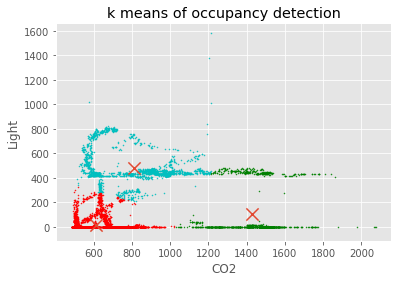

For n_clusters = 3 The average silhouette_score is : 0.671992587818


In [8]:
from matplotlib import style

style.use("ggplot")
colors = ['r.','g.','c.']
for i in range(len(inputs)):
    plt.plot(inputs[i][3], inputs[i][2], colors[labels[i]], markersize = 1) #light x temperature

#plt.figure(figsize=(9, 9))
plt.scatter(centroids[:, 3],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 10) #CO2 x Light
plt.title("k means of occupancy detection")

plt.xlabel('CO2')
plt.ylabel('Light')
plt.show()
plt.savefig('CO2xLight.png', dpi=150)


# the quality of the cluster 0 to 1. If result is towards 1 then it is better.
silhouette_avg = silhouette_score(inputs, labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)

# Data visualization 

## Visualizing daily profiles

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

import json
from datetime import datetime

%matplotlib inline
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
from sklearn import metrics
#import numpy as np

import seaborn as sns
sns.set_context(context='talk', font_scale=2)

occ = pd.read_csv("datatestx.csv", parse_dates=True, index_col='Date')
occ.head()

,Index,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,,
2015-02-11 14:48:00,1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,5,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [10]:
a = occ[['Occupancy']]
a = a.resample('1h').mean()
a.head()

,Occupancy
Date,
2015-02-11 14:00:00,1.000000
2015-02-11 15:00:00,0.950000
2015-02-11 16:00:00,1.000000
2015-02-11 17:00:00,1.000000
2015-02-11 18:00:00,0.416667


In [11]:
a['Time'] = a.index.map(lambda t: t.time())
a['Date2'] = a.index.map(lambda t: t.date())
a.head()

,Occupancy,Time,Date2
Date,,,
2015-02-11 14:00:00,1.000000,14:00:00,2015-02-11
2015-02-11 15:00:00,0.950000,15:00:00,2015-02-11
2015-02-11 16:00:00,1.000000,16:00:00,2015-02-11
2015-02-11 17:00:00,1.000000,17:00:00,2015-02-11
2015-02-11 18:00:00,0.416667,18:00:00,2015-02-11


In [12]:
dailyblocks = pd.pivot_table(a, values='Occupancy', index='Date2', columns='Time', aggfunc='mean')
dailyblocks.head()

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date2,,,,,,,,,,,,,,,,,,,,,
2015-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.95,1.000000,1.000000,0.416667,0.0,0.0,0.0,0.0,0.0
2015-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423729,1.000000,...,0.016949,0.00,0.836066,0.745763,0.000000,0.0,0.0,0.0,0.0,0.0
2015-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016949,0.983333,...,1.000000,1.00,1.000000,0.966102,0.100000,0.0,0.0,0.0,0.0,0.0
2015-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2015-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
dailyblocksmatrix = np.matrix(dailyblocks.dropna())
centers, _ = kmeans(dailyblocksmatrix, 4, iter=10000)
cluster, _ = vq(dailyblocksmatrix, centers)
clusterocc = pd.DataFrame(cluster, columns=['ClusterNo'])
dailyclusters = pd.concat([dailyblocks.dropna().reset_index(), clusterocc], axis=1) 
dailyclusters.head()

,Date2,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,ClusterNo
0,2015-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423729,...,0.0,0.836066,0.745763,0.000000,0.0,0.0,0.0,0.0,0.0,3
1,2015-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016949,...,1.0,1.000000,0.966102,0.100000,0.0,0.0,0.0,0.0,0.0,2
2,2015-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,2015-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,2015-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203390,...,1.0,1.000000,1.000000,0.083333,0.0,0.0,0.0,0.0,0.0,1


The last column is the cluster number assigned by the k-means process. We'll first reorder the clustering numbers so that the greatest consuming clusters have the highest numbers:

In [14]:
b = dailyclusters.groupby('ClusterNo').mean().sum(axis=1).sort_values()
b = pd.DataFrame(b.reset_index())
b['ClusterNo2'] = b.index
b = b.set_index('ClusterNo')
b = b.drop([0], axis=1)
dailyclusters = dailyclusters.merge(b, how='outer', left_on='ClusterNo', right_index=True)
dailyclusters.head()

,Date2,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,ClusterNo,ClusterNo2
0,2015-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423729,...,0.836066,0.745763,0.0,0.0,0.0,0.0,0.0,0.0,3,1
1,2015-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016949,...,1.000000,0.966102,0.1,0.0,0.0,0.0,0.0,0.0,2,2
5,2015-02-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322034,...,1.000000,1.000000,0.1,0.0,0.0,0.0,0.0,0.0,2,2
2,2015-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2015-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [15]:
dailyclusters = dailyclusters.drop(['ClusterNo'],axis=1)
dailyclusters = dailyclusters.set_index(['ClusterNo2','Date2']).T.sort_index()
dailyclusters.head()

ClusterNo2          1          2                     0                     3
Date2      2015-02-12 2015-02-13 2015-02-17 2015-02-14 2015-02-15 2015-02-16
00:00:00          0.0        0.0        0.0        0.0        0.0        0.0
01:00:00          0.0        0.0        0.0        0.0        0.0        0.0
02:00:00          0.0        0.0        0.0        0.0        0.0        0.0
03:00:00          0.0        0.0        0.0        0.0        0.0        0.0
04:00:00          0.0        0.0        0.0        0.0        0.0        0.0

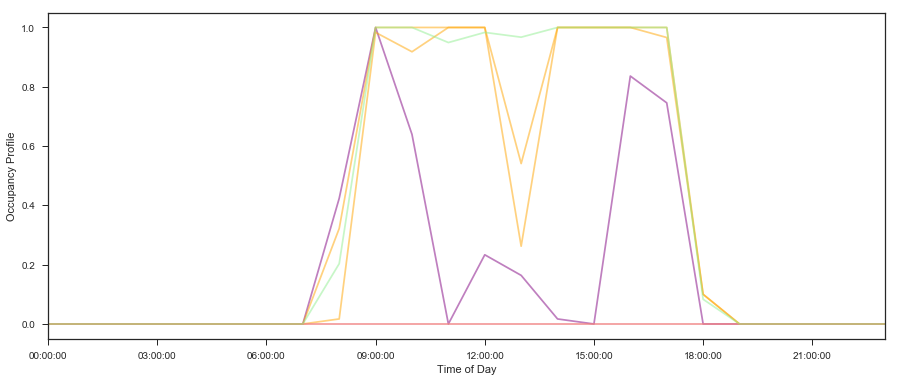

In [22]:
clusterlist = list(dailyclusters.columns.get_level_values(0).unique())
matplotlib.rcParams['figure.figsize'] = 15, 6

styles2 = ['Purple','Orange','LightCoral','LightGreen','r','Plum','Gold','b']
fig, ax = plt.subplots()
for col, style in zip(clusterlist, styles2):
    dailyclusters[col].plot(ax=ax, legend=False, style=style, alpha=0.5, xticks=np.arange(0, 86400, 10800))

ax.set_ylabel('Occupancy Profile')
ax.set_xlabel('Time of Day')
plt.savefig("clusters_total_overlaid_profiles.png", figsize=(15,15), dpi=72)

The occupancy are not 1 or 0 because the values were resampled at each 1 hours. Therefore, in some hours there is a semi occupancy because in some minutes they are occupied or not. This is datastep equal to simulation softwares or weather data and could be used as a better comparison when having data/results coming from those sources.

## Correlation Matrix

-0.47
0.71
0.20
-0.19
-0.08
0.19


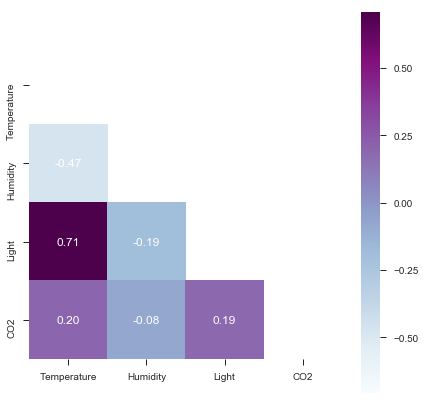

In [23]:
import seaborn as sns
corr = occnorm.corr()
fig, ax = plt.subplots(figsize=(7, 7))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr,mask=mask, cmap=plt.cm.BuPu, square=True, vmin=-vmax, vmax=vmax, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        s = "{:.2f}".format(corr.values[i,j])
        ax.text(i+0.5,j+0.5,s, color='w', ha="center", va="center")
        print(s)
        
plt.show()
fig.savefig('correlation_matrix.png', dpi=150)

## Hexbin plots of variables

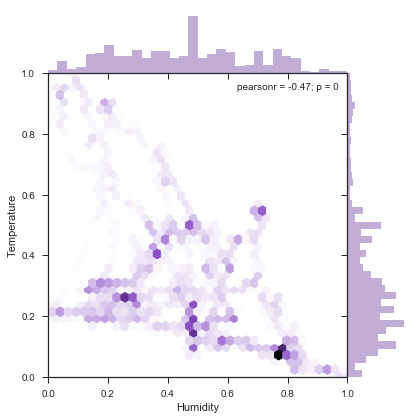

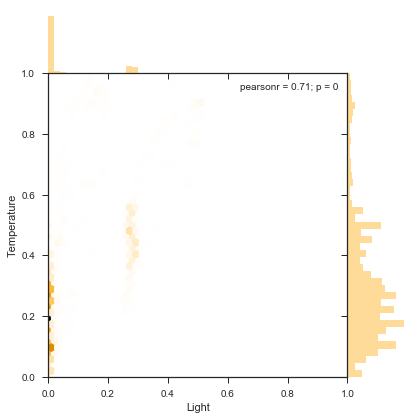

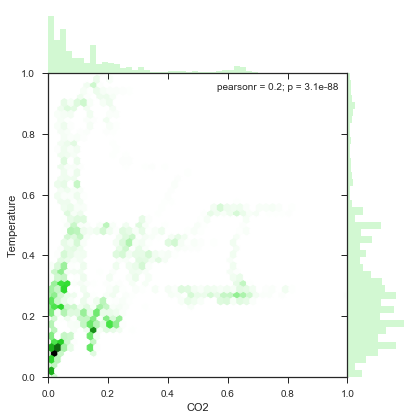

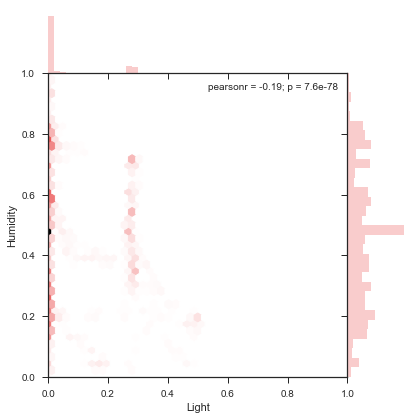

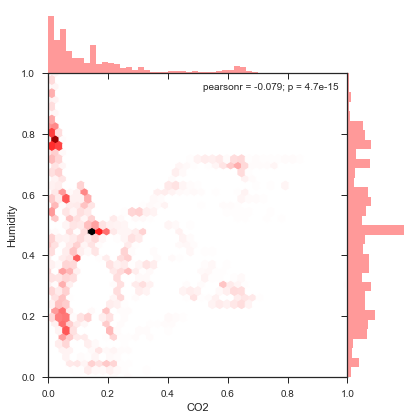

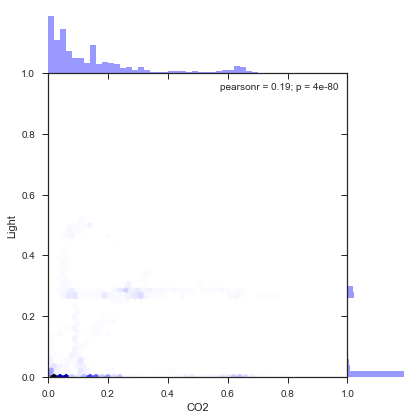

In [18]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns

sns.set(style="ticks")

g = sns.jointplot("Humidity", "Temperature", data=occnorm, kind="hex", space=0, color='rebeccaPurple')
plt.savefig("TxH.png", figsize=(15, 15), dpi=150) #to put as background of presentation
plt.show()
g = sns.jointplot("Light", "Temperature", data=occnorm, kind="hex", space=0, color='Orange')
plt.savefig("LxT.png", figsize=(15, 15), dpi=150)
plt.show()
g = sns.jointplot("CO2", "Temperature", data=occnorm, kind="hex", space=0, color='LightGreen')
plt.savefig("CxT.png", figsize=(15, 15), dpi=150)
plt.show()
g = sns.jointplot("Light", "Humidity", data=occnorm, kind="hex", space=0, color='LightCoral')
plt.savefig("LxH.png", figsize=(15, 15), dpi=150)
plt.show()
g = sns.jointplot("CO2", "Humidity", data=occnorm, kind="hex", space=0, color='r')
plt.savefig("CxH.png", figsize=(15, 15), dpi=150)
plt.show()
g = sns.jointplot("CO2", "Light", data=occnorm, kind="hex", space=0, color='b')
plt.savefig("CxL.png", figsize=(15, 15), dpi=150)
plt.show()